In [6]:
from helpy import HistFile
import hist
import mplhep
mplhep.style.use('ROOT')

import matplotlib.pyplot as plt

In [7]:
f = HistFile('hist.root', 'ReducedEaT')
f.keys()

['n_hcal_veto_hits']

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f99c2719eb0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

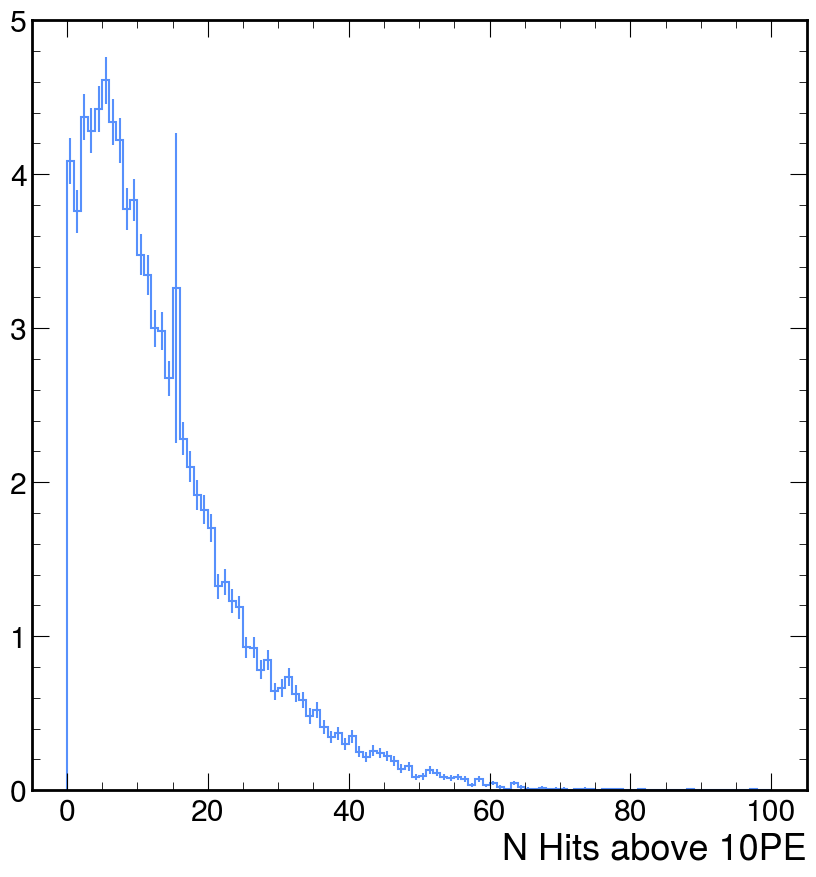

In [4]:
f['n_hcal_veto_hits'].to_hist().plot()